In [8]:
# DS
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import gensim
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

from my_utils import *

In [2]:
pd.options.mode.chained_assignment = None  # default='warn' # disable chain assignment warnings

p_data = "data"

print(VERSION)

v3.0


# POI2Vec

In [3]:
gdf_zoning = read_csv_to_gdf(f"result/gdf_zoning_{VERSION}.csv")
gdf_poi = read_csv_to_gdf(f"result/gdf_poi_{VERSION}.csv")

##  generate sequences

### Option 1. Distance Greedy 

In [4]:
sequences = get_sequences_by_distancegreedy(gdf_zoning, gdf_poi)

100%|██████████████████████████████████████████████████████████████████████████████| 5470/5470 [01:44<00:00, 52.18it/s]


In [9]:
np.save(f"result/Sequences_greedy_{VERSION}.npy", sequences)

In [13]:
list(sequences.keys())

[1,
 2,
 3,
 4,
 5,
 9,
 11,
 12,
 15,
 17,
 18,
 20,
 22,
 23,
 24,
 25,
 26,
 29,
 30,
 33,
 35,
 36,
 39,
 41,
 46,
 47,
 50,
 51,
 52,
 54,
 56,
 59,
 62,
 64,
 68,
 69,
 71,
 73,
 75,
 82,
 87,
 88,
 93,
 95,
 99,
 100,
 104,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 117,
 121,
 123,
 125,
 127,
 128,
 130,
 134,
 136,
 139,
 142,
 144,
 145,
 147,
 148,
 150,
 155,
 156,
 159,
 160,
 161,
 163,
 164,
 167,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 186,
 188,
 191,
 192,
 193,
 194,
 196,
 197,
 199,
 201,
 202,
 203,
 209,
 210,
 212,
 214,
 215,
 216,
 218,
 219,
 220,
 222,
 223,
 229,
 231,
 233,
 234,
 237,
 238,
 239,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 250,
 252,
 254,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 265,
 266,
 268,
 270,
 272,
 273,
 274,
 276,
 277,
 279,
 280,
 281,
 283,
 284,
 286,
 291,
 292,
 295,
 301,
 302,
 305,
 306,
 308,
 311,
 313,
 314,
 321,
 325,
 326,
 328,
 330,
 333,
 335,
 336,
 338,
 339,
 342,
 346,
 348,
 352,
 

<AxesSubplot:>

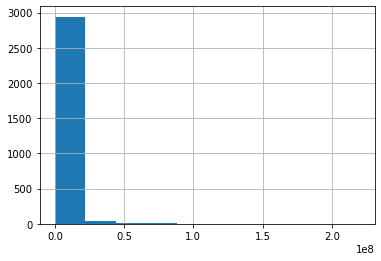

In [26]:
gdf_zoning.iloc[np.array(list(sequences.keys()))].Shape_Area.hist()

In [31]:
gdf_zoning

,ZONEDIST,Shape_Leng,Shape_Area,geometry,zone_c
0,R5,1862.207446,1.943711e+05,"POLYGON ((-74.08707 40.64779, -74.08678 40.647...",R
1,R5,19208.305164,2.767667e+06,"POLYGON ((-74.08717 40.64470, -74.08717 40.644...",R
2,R6,2935.376415,5.333286e+05,"POLYGON ((-74.08143 40.64602, -74.08140 40.646...",R
3,R4,3246.982638,5.797014e+05,"POLYGON ((-74.08143 40.64602, -74.08135 40.645...",R
4,M1-1,1797.546542,1.966755e+05,"POLYGON ((-74.08683 40.64491, -74.08717 40.644...",M
...,...,...,...,...,...
5465,PARK,89.886438,2.464241e+01,"POLYGON ((-73.92673 40.85872, -73.92671 40.858...",P
5466,PARK,90.809731,2.530755e+01,"POLYGON ((-73.92660 40.85889, -73.92658 40.858...",P
5467,PARK,319.401729,3.051550e+01,"POLYGON ((-73.92641 40.85905, -73.92637 40.859...",P
5468,PARK,426.120847,6.939689e+01,"POLYGON ((-73.92692 40.85815, -73.92688 40.858...",P


In [44]:
gdf_zoning[gdf_zoning.zone_c =="R"]

,ZONEDIST,Shape_Leng,Shape_Area,geometry,zone_c
0,R5,1862.207446,1.943711e+05,"POLYGON ((-74.08707 40.64779, -74.08678 40.647...",R
1,R5,19208.305164,2.767667e+06,"POLYGON ((-74.08717 40.64470, -74.08717 40.644...",R
2,R6,2935.376415,5.333286e+05,"POLYGON ((-74.08143 40.64602, -74.08140 40.646...",R
3,R4,3246.982638,5.797014e+05,"POLYGON ((-74.08143 40.64602, -74.08135 40.645...",R
6,R3-2,1216.987349,4.994546e+04,"POLYGON ((-74.11244 40.64384, -74.11243 40.643...",R
...,...,...,...,...,...
5459,R7-2,362.935612,4.242221e+01,"POLYGON ((-73.92457 40.85742, -73.92481 40.857...",R
5460,R7-2,161.179690,4.473256e+01,"POLYGON ((-73.92568 40.85949, -73.92548 40.859...",R
5461,R7-2,189.146666,4.546219e+01,"POLYGON ((-73.92497 40.86035, -73.92487 40.860...",R
5462,R7-2,947.482653,2.109820e+04,"POLYGON ((-73.92686 40.85777, -73.92698 40.857...",R


In [59]:
np.sort(gdf_zoning.ZONEDIST.unique())

array(['BPC', 'C1-6', 'C1-6A', 'C1-7', 'C1-7A', 'C1-8', 'C1-8A', 'C1-8X',
       'C1-9', 'C1-9A', 'C2-6', 'C2-6A', 'C2-7', 'C2-7A', 'C2-8', 'C2-8A',
       'C3', 'C3A', 'C4-1', 'C4-2', 'C4-2A', 'C4-2F', 'C4-3', 'C4-3A',
       'C4-4', 'C4-4A', 'C4-4D', 'C4-4L', 'C4-5', 'C4-5A', 'C4-5D',
       'C4-5X', 'C4-6', 'C4-6A', 'C4-7', 'C5-1', 'C5-1A', 'C5-2',
       'C5-2.5', 'C5-2A', 'C5-3', 'C5-4', 'C5-5', 'C5-P', 'C6-1', 'C6-1A',
       'C6-1G', 'C6-2', 'C6-2A', 'C6-2G', 'C6-2M', 'C6-3', 'C6-3A',
       'C6-3D', 'C6-3X', 'C6-4', 'C6-4.5', 'C6-4A', 'C6-4M', 'C6-4X',
       'C6-5', 'C6-5.5', 'C6-6', 'C6-6.5', 'C6-7', 'C6-7T', 'C6-9', 'C7',
       'C8-1', 'C8-2', 'C8-3', 'C8-4', 'M1-1', 'M1-1/R5', 'M1-1/R7-2',
       'M1-1/R7D', 'M1-1D', 'M1-2', 'M1-2/R5B', 'M1-2/R5D', 'M1-2/R6',
       'M1-2/R6A', 'M1-2/R6B', 'M1-2/R7A', 'M1-2/R8', 'M1-2/R8A', 'M1-2D',
       'M1-3', 'M1-3/R7X', 'M1-3/R8', 'M1-4', 'M1-4/R6A', 'M1-4/R6B',
       'M1-4/R7-2', 'M1-4/R7A', 'M1-4/R7X', 'M1-4/R8A', 'M1-4D', 'M1-5',

In [53]:
gdf_zoning.groupby("zone_c").unary_union.geoms

AttributeError: 'DataFrameGroupBy' object has no attribute 'unary_union'

<AxesSubplot:>

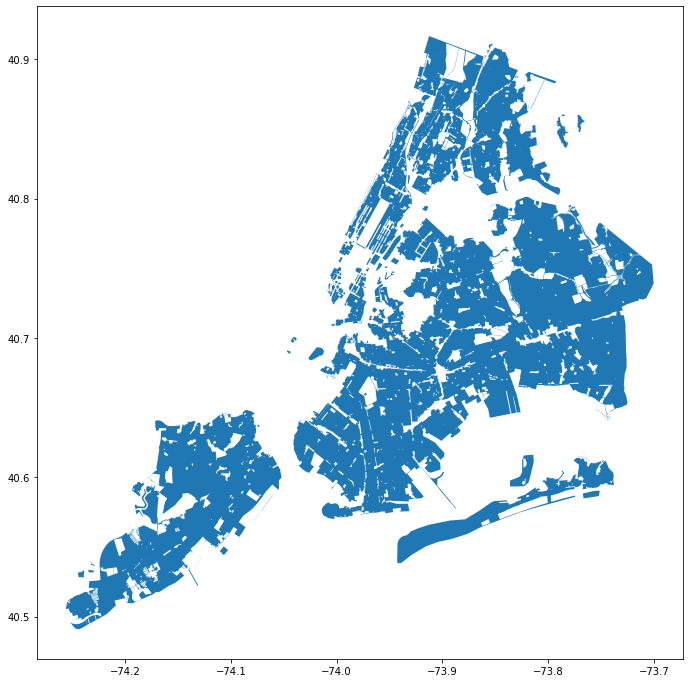

In [52]:
gpd.GeoDataFrame(pd.DataFrame(x).assign(zone="R"),crs="epsg:4326",geometry = 0).plot(figsize=(12,12))

In [43]:
len(x)a

135

<AxesSubplot:>

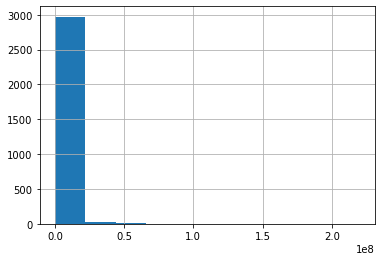

In [25]:
gdf_zoning.iloc[~np.array(list(sequences.keys()))].Shape_Area.hist()